<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-Geospatial-Data" data-toc-modified-id="Working-with-Geospatial-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with Geospatial Data</a></span><ul class="toc-item"><li><span><a href="#Geospatial-Data-Handling-in-Python" data-toc-modified-id="Geospatial-Data-Handling-in-Python-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Geospatial Data Handling in Python</a></span></li><li><span><a href="#Loading-geospatial-data" data-toc-modified-id="Loading-geospatial-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading geospatial data</a></span></li></ul></li><li><span><a href="#Examining-geodata-with-GeoPandas" data-toc-modified-id="Examining-geodata-with-GeoPandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examining geodata with GeoPandas</a></span><ul class="toc-item"><li><span><a href="#What-the-DF" data-toc-modified-id="What-the-DF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What the DF</a></span></li><li><span><a href="#Getting-used-to-(geo)-dataframes" data-toc-modified-id="Getting-used-to-(geo)-dataframes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Getting used to (geo) dataframes</a></span></li><li><span><a href="#Visualizing-geospatial-data-using-matplotlib" data-toc-modified-id="Visualizing-geospatial-data-using-matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualizing geospatial data using matplotlib</a></span></li><li><span><a href="#Mapping-our-geodata(frame)" data-toc-modified-id="Mapping-our-geodata(frame)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Mapping our geodata(frame)</a></span></li></ul></li><li><span><a href="#Interactive-Mapping-with-Folium" data-toc-modified-id="Interactive-Mapping-with-Folium-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interactive Mapping with Folium</a></span><ul class="toc-item"><li><span><a href="#Calculating-the-map-center" data-toc-modified-id="Calculating-the-map-center-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculating the map center</a></span></li><li><span><a href="#Creating-a-folium-map" data-toc-modified-id="Creating-a-folium-map-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Creating a folium map</a></span></li></ul></li></ul></div>

# Introducing Python and GIS


__Objectives:__  
  * Import geospatial libraries
  * Open shapefiles with Python
  * Interrogate data tables
  * Display shapefiles

## Working with Geospatial Data
Python has several popular libraries to work with geospatial data types.

There are two types of spatial data types:

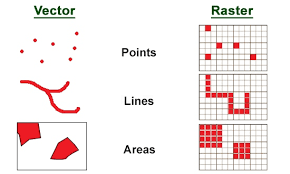

### Geospatial Data Handling in Python

__For vector data we will use:__

[GeoPandas](http://geopandas.org/)  

__For raster data we will use:__  
[Rasterio](https://rasterio.readthedocs.io/en/stable/intro.html)


__For both geospatial data types we will use:__  
- GDAL - Handles all GIS processing  
- Matplotlib - For plotting map data  
- Numpy - For interacting with data    
- Folium - For interactive mapping


`GDAL` is necessary for interacting with geospatial data, while `matplotlib` and `numpy` are Python tools that can work with geospatial data once it has been loaded in. `Folium` is used for interactive mapping in Jupyter Notebooks.


### Loading geospatial data 

Lets start by loading a shapefile!  

We will begin by importing `gdal` and `geopandas` libraries for working with the data.

Also bring in `matplotlib` and `folium` so we can show our map.

In [1]:
# make sure we have all our Python library requirements
!pip install -r requirements.txt

#import our libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

#these are optional, but make our tables look nice
from IPython.display import display, HTML
from pandas.plotting import table

The command to open a file in `geopandas` is:  
```gdf = gpd.read_file('PATH_TO_YOUR_DATA')```

Our path will look like this:  
        ```gdf = gpd.read_file("./data/shapefiles/LA_City_Neighborhood_Council_Demographics.shp")```

## Examining geodata with GeoPandas

The easiest way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command.

### What the DF

Dataframes (df) are `Pandas'` way of breaking down tables into views. Think of them as mini Excel Sheets or workbooks. The key benefit is that each time you want to see part of the data, you can select it into a data frame instead of working with the entire data. `GeoPandas` takes `Pandas` functionality and adds geospatial ability to analyze and process those frames as geodataframes (gdf).

In [2]:
gdf = gpd.read_file("./data/shapefiles/LA_City_Neighborhood_Council_Demographics.shp")
data = gdf
## Our data is big, so we can preview it using ##
print(data.head())

## We can also see what columns there are ##
# for column in data.columns:
#     print(column)

   FID  OBJECTID                    NAME                          WADDRESS  \
0    1         1      LINCOLN HEIGHTS NC  http://www.lincolnheightsnc.org/   
1    2         2         VOICES OF 90037                              None   
2    3         3            LOS FELIZ NC        http://www.losfeliznc.org/   
3    4         4        MISSION HILLS NC            http://mhnconline.org/   
4    5         5  GREATER TOLUCA LAKE NC             http://www.gtlnc.org/   

                             DWEBSITE               DEMAIL        DPHONE  \
0           http://empowerla.org/LHNC   LHNC@EmpowerLA.org  213-978-1551   
1  http://empowerla.org/VOICESOF90037   V9NC@EmpowerLA.org  213-978-1551   
2           http://empowerla.org/LFNC   LFNC@EmpowerLA.org  213-978-1551   
3           http://empowerla.org/MHNC   MHNC@EmpowerLA.org  213-978-1551   
4          http://empowerla.org/GTLNC  GTLNC@EmpowerLA.org  213-978-1551   

   NC_ID                 CERTIFIED                 TOOLTIP  ...  fem65and6

### Getting used to (geo) dataframes

- Let's select `female` and `male` demographic data with a `.loc[]` reference and then `describe()` it.

- Display the described data nicely using `display(HTML)` from Jupyter.

In [3]:
sex_subset = gdf.loc[:,['female','male','geometry']]
desc = sex_subset.describe()
display(HTML(desc.round(2).to_html()))

,female,male
count,97.00,97.00
mean,19911.94,19508.11
std,9694.66,9334.23
min,2013.75,2050.09
25%,12842.83,12634.29
50%,17908.84,17539.39
75%,24578.17,23579.63
max,49603.87,50524.51


### Visualizing geospatial data using matplotlib

 __Now we will graph our geodataframe using `matplotlib`__

In [ ]:
data_to_plot = sex_subset
# print(sex_subset.describe())
# Create a figure instance
fig = plt.figure()
df = pd.DataFrame(sex_subset.loc[:,['female']])
df2 = pd.DataFrame(sex_subset.loc[:,['male']])

df.plot(style=['o','ro'])
df2.plot(style='ro')

### Mapping our geodata(frame)

Having a __geodataframe__ makes our data plottable as a map, through the very simple `gdf.plot()` function.   

This functionality begins to showcase how `geopandas` is different from `pandas`.

*Note: We have to specify a `figsize` (figure size) in `(width,height)` otherwise our map won't know how big to display.*

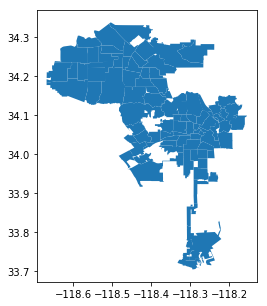

In [4]:
gdf.plot(figsize=(5,5))

What happens if you want to add a legend or style the map more?

Because __`geopandas`__ is built ontop of __`pandas`__

And __`pandas`__ is built ontop of __`matplotlib`__...

__`matplotlib`__ is required to customize our map.

Instead of relying on the geopandas wrapper, `__plot()__` needs to be tweaked a bit to enable __`matplotlib`__ to customize.

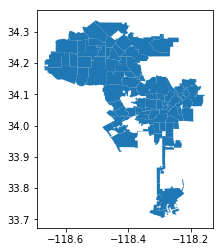

In [8]:
# add a figure and axis variable, and use matplotlib (plt) to define it
fig, ax = plt.subplots(1)
gdf.plot(ax=ax)

__Various parameters customize the plot:__   
+      __column__ - creates a choropleth from one column of data (ex. `female`)   
+      __legend__ - shows a legend (ex. `True` or `False`)  
+      __cmap__ - uses a color map (ex. `copper`)  

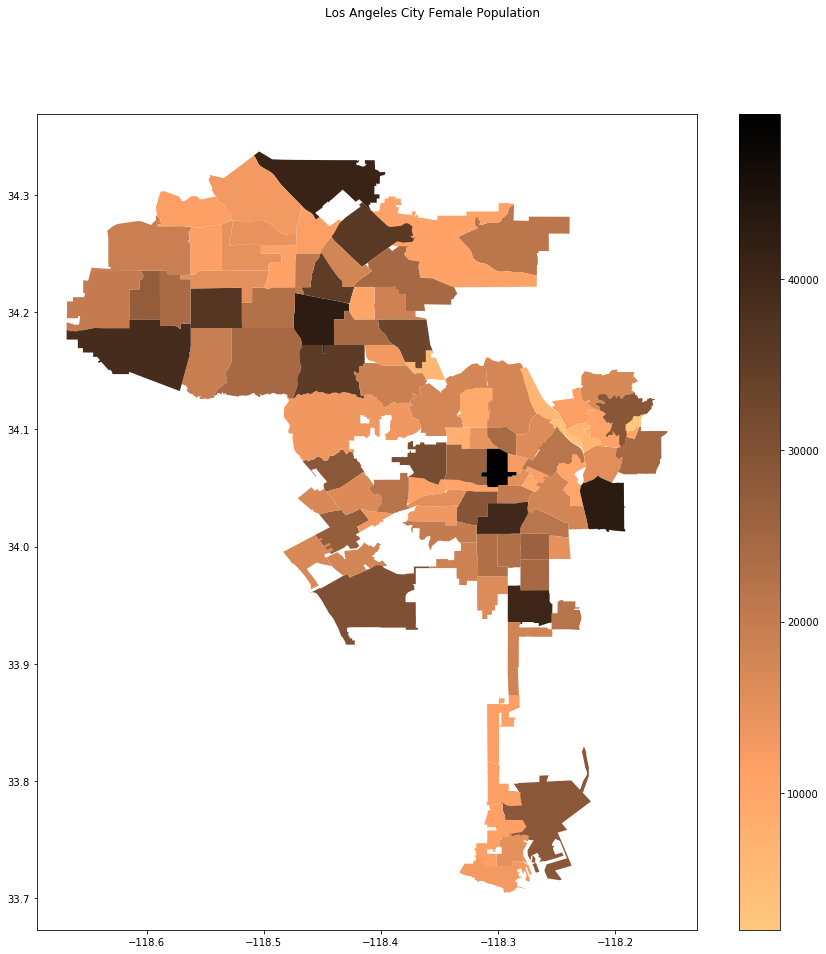

In [26]:
fig, ax = plt.subplots(1,figsize=(15, 15))
# to add a title we use
fig.suptitle('Los Angeles City Female Population')

# we can also specify a column to make our map into a choropleth
gdf.plot(ax=ax,column='female',legend=True,cmap='copper_r')

## Interactive Mapping with Folium

Now lets use folium to map data!

### Calculating the map center  
__Why is a map center necessary?__  
__`matplotlib`'s__`plot` function only shows the data, while __`folium`__ shows the world, so we want to make sure our map is centered properly.

We will still be using our female/male dataframe (`sex_subset`), but we want to be sure it is projected correctly and use the geographic center of the dataset as the center for our map.

 `our_subset.to_crs(epsg='4326')` reprojects our data.  
 
 `our_data.total_bounds` will then give us the boundaries of our data set as a pair of two `[x,y]` coordinates.
 

In [14]:
la_crop_extent = sex_subset.to_crs(epsg='4326')

map_center = sex_subset.total_bounds

# We get the average of the map_center for the x and y values
x_center = (map_center[0]+map_center[2])/2
y_center = (map_center[1]+map_center[3])/2

# We can print the values here to check
print(x_center,y_center)

-118.411791055067 34.0209599089927


### Creating a folium map

After getting the map center, we will then create our __`folium`__ map centered around those values.

Since our `sex_subset` is a geodataframe, we can translate it to a `json()` and have it easily shown in __`folium`__. 

We can (and will!) visualize our data as a geodataframe in __`folium`__ but the code will be covered later. 

In [15]:
# create our map and feed the location our center values
fmap = folium.Map(location=[y_center,x_center], 
                    tiles='cartodbpositron',
                    zoom_start=9,
                    control_scale=True)

# convert our geodataframe into geojson
sex_subset_json = sex_subset.to_crs(epsg='4326').to_json()
polygons = folium.features.GeoJson(sex_subset_json)

# add the geojson polygons to the map
fmap.add_child(polygons)
# show the map
fmap